In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://data.moi.gov.tw/moiOD/System/DownloadFile.aspx?DATA=AAB80651-716F-4969-B5F8-5FD41B2DF7B2')

In [3]:
df.head()

,statistic_yyy,site_id,village,household_ordinary_total,household_business_total,household_single_total,household_ordinary_m,household_business_m,household_single_m,household_ordinary_f,household_business_f,household_single_f
0,統計年,區域別,村里名稱,共同生活戶_戶數,共同事業戶_戶數,單獨生活戶_戶數,共同生活戶_男,共同事業戶_男,單獨生活戶_男,共同生活戶_女,共同事業戶_女,單獨生活戶_女
1,106,新北市板橋區,留侯里,436,0,238,669,0,106,738,0,132
2,106,新北市板橋區,流芳里,389,0,251,620,0,110,696,0,141
3,106,新北市板橋區,赤松里,216,0,108,348,0,57,375,0,51
4,106,新北市板橋區,黃石里,297,0,139,501,0,67,507,0,72


In [4]:
df2 = df.drop(0, axis=0)

In [5]:
df3 = df2.drop(['statistic_yyy','household_ordinary_total','household_business_total','household_single_total','household_ordinary_m','household_business_m','household_ordinary_f','household_business_f'], axis=1)


In [31]:
df3.head()

,site_id,village,household_single_m,household_single_f
1,新北市板橋區,留侯里,106,132
2,新北市板橋區,流芳里,110,141
3,新北市板橋區,赤松里,57,51
4,新北市板橋區,黃石里,67,72
5,新北市板橋區,挹秀里,144,152


In [6]:
df4 = df3[:150]  #取前150資料做線性迴歸
x = np.array(df4.household_single_m)
y = np.array(df4.household_single_f)

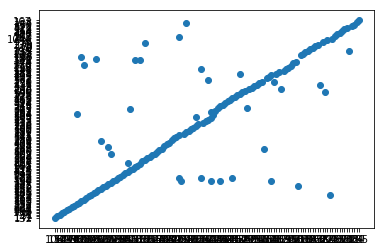

In [22]:
plt.scatter(x, y)

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [27]:
X = x.reshape(len(x), 1)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
Y = regr.predict(X)

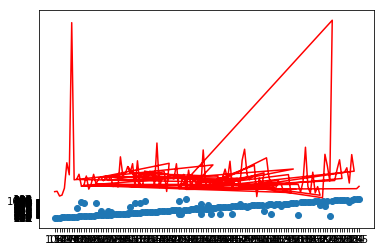

In [29]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')

                 此題目不適合做線性迴歸

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = x.reshape(len(x),1)
Y = y.reshape(len(y),1)
# 隨機切
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1999)

In [18]:
regr = LinearRegression()
regr.fit(x_train,y_train)
Y_pred = regr.predict(x_test)

In [17]:
regr.score(x_test, y_test) 

0.46149335250815815

預測準確率很低